Carolyn White  
ABE 516X  
Dr. Adina Howe  
Fall 2021  

# Iowa State University - Uganda Program
# 2021 Water User Committee Project
## Class Exercise
#### ABE 516X Final Course Project

In [1]:
#General Imports
import pandas as pd
import numpy as np
from scipy import stats

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
#Load Data
raw_df = pd.read_excel('E:/ISU/Graduate/Courses/F21/ABE 516X/ISU-UP_RawData.xlsx')
print('DataFrame Shape:', raw_df.shape)
raw_df.head()

DataFrame Shape: (24, 39)


,Respondent,1,2,3,4,5,6_women,6_men,6_persons-with-disabilities,7.1,...,15,16,17,18,19,20.1,20.2,21,22,23
0,1410,Treasurer,I was chosen by the community members,I am able to get clean and safe water for home...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,3.0,3.0,0.0,Yes,...,monthly,insides pipes repair; piston repair; oiling of...,cylinder breakdown for one month,poor handling of the borehole; delayed greasing,b,yes,number of households; water user fee; committe...,jerrycan washings by every water user; hygiene...,misunderstandings of committee members; failur...,additional training by the organization about ...
1,1411,Guard,I volunteered to giver services to the community,cooperation from the community members; cooper...,6.0,guards(x2); vice chairperson; chairperson; sec...,4.0,2.0,0.0,yes,...,monthly,greasing of the movable parts; pipe replacemen...,none,mishandling by the water users; theft of some ...,b,yes,water user fee; number of households,no fetching water at night; cleaning/washing j...,lack of an appropriate model to the borehole; ...,routine management of water cistern at the bor...
2,1412,Treasurer,The community chose her because they trusted h...,because the community has trust on me,6.0,chairperson; treasurer; secretary; representat...,2.0,4.0,0.0,yes,...,NaN,NaN,NaN,poor pumping by children; banging on the handle,b,yes,water user fee; number of households; water us...,"washing jerrycans; time management, lining jer...",failure of community people to clean the boreh...,fencing of the borehole
3,1413,Chairperson,selected by community members because he is a ...,he was trained on how to manage the borehole s...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,1.0,yes,...,every 3 months,valve replacement; piston repair; chain repair...,NaN,poor handling of the boreholeby the children m...,b,yes,water user fees; number of households; expendi...,diffing and [slashing] around the borehole; fe...,disunity during [fee] collection; fetching wat...,provision of amendable fence by organization; ...
4,1414,Treasurer,Was elected by community member because there ...,because people are social and good to work wit...,6.0,Chairperson; Vice Chairperson; Treasurer; Secr...,2.0,4.0,0.0,yes,...,monthly,chain greasing and replacement; pipes replacem...,handle breakdown in 2019 for one month,poor/bad pumping; delayed greasing; spoilage o...,b,yes,costs involved; parts repaired; date of mainte...,rountine cleaning of the borehole area; washin...,faulty padlocks; abuse by the community member...,we ask for more support from ISU-UP in case of...


Let's view and become familiar with the data using the following:

- raw_df.describe()  
- raw_df.dtypes  
- raw_df.columns  
- raw_df['Column Name'].unique()
    - choose the column(s) that you desire to observe
- raw_df.isnull()

### Data Wrangling/Cleaning Required
Welcome to follow along and view individual steps or pass the code through to reach linear regression

In [3]:
#Task 1 - Drop row/columns

#Drop row 8 and columns Respondent, 10.2; reindex
data_df = raw_df.drop(index=8, columns=['Respondent'])
data_df = data_df.reset_index(drop=True)
data_df

data_df = data_df.drop(columns=[10.2])
data = data_df.copy()
data

#Task 2 - Deal with assumptions

#10.1: none, nan = no
#11: nan, range = avg value
#12.a.1: nan = no
#12.a.3: range = avg; none = 0
#17: nan = none
#19: nan = b
#20.1: nan = yes

#10.1
data.iloc[2, 13] = 'no'
#11
data.iloc[0, 14] = 65000
data.iloc[18,14] = 75000
data[11].fillna(data[11].mean())
#12.a.1
data['12.a.1'].fillna('no')
#12.a.3
data.iloc[1, 18] = 120000
data.iloc[3, 18] = 90000
data.iloc[4, 18] = 110000
data.iloc[5, 18] = 75000
data.iloc[6, 18] = 70000
data.iloc[7, 18] = 105000
data.iloc[9, 18] = 150000
data.iloc[10, 18] = 105000
data.iloc[11, 18] = 65000
data.iloc[12, 18] = 125000
data.iloc[13, 18] = 75000
data.iloc[15, 18] = 75000
#data['12.a.3'].replace(to_replace='none', value=0)
for r in range (23):
    if data.iloc[r, 18] == 'none':
        data.iloc[r, 18] = 0
#12.a.4
for r in range (23):
    if data.iloc[r, 19] == 'none':
        data.iloc[r, 19] = 'no'
#17
data[17].fillna('none')
#19
data[19].fillna('b')
#20.1
data[20.1].fillna('yes')

data

#Task 3 - Remove all capitalized letters

print(data[7.1].unique())
#data.iloc[1, 0].type
#type(data.iloc[1, 0])

wordcol = [1, 2, 3, 5, 7.1, 7.2, 9.1, 10.1, 12, '12.a.4', '12.b.1', '12.b.2', '12.b.3', '12.b.4', '12.b.5', 13, 14, 15, 16, 17, 18, 19, 21, 22, 23]

for c in wordcol:
    #print(data[c].dtype)
    data[c] = data[c].str.lower()

data

#Verify lowercase against (yes, Yes)
print(data[7.1].unique())
print(data['12.a.4'].unique())

#Task 4 - Adjust time to numerical values (p1)

#8 -> x times per year
#12.b.2 -> do x times per year (e.x. monthly = 12, weekly = 52, annually = 1)
#14 -> x times per year
#15 -> x times per year

timecol = [10, 21, 26, 27]

for r in range (23):
    for c in timecol:
        if data.iloc[r, c] == 'once a year' or data.iloc[r, c] == 'yearly' or data.iloc[r, c] == 'annually':
            data.iloc[r, c] = 1
        if data.iloc[r, c] == 'biannually':
            data.iloc[r, c] = 2
        if data.iloc[r, c] == '3 times per year' or data.iloc[r, c] == 'every 4 months':
            data.iloc[r, c] = 3
        if data.iloc[r, c] == '4 times per year' or data.iloc[r, c] == 'every 3 months':
            data.iloc[r, c] = 4
        if data.iloc[r, c] == '6 times per year' or data.iloc[r, c] == 'every 2 months':
            data.iloc[r, c] = 6
        if data.iloc[r, c] == 'monthly':
            data.iloc[r, c] = 12
        if data.iloc[r, c] == 'biweekly':
            data.iloc[r, c] = 26
        if data.iloc[r, c] == 'weekly':
            data.iloc[r, c] = 52
        if data.iloc[r, c] == 'daily':
            data.iloc[r, c] = 365

print(data[8])
print(data['12.b.2'])
print(data[14])
print(data[15])

#Task 4 - Adjust time to numerical values (p2)

#12.b.1 -> do amount per household per year
data['12.b.1']

#assume row 1 should be 5000 per household per year
#assume row 6 should be 5000 per hoursehold per year

data.iloc[1, 20] = '5000 per household per year'
data.iloc[6, 20] = '5000 per household per year'

for r in range(23):
    if data.iloc[r, 20][-5:] == 'month':
        data['12.b.1'] = data['12.b.1'].str.slice(0, 3)
    else:
        data['12.b.1'] = data['12.b.1'].str.slice(0, 4)

data['12.b.1']

#Task 4 - Adjust time to numerical values (p3)
#Convert to integers from string
data[[4, '6_women', '6_men', '6_persons-with-disabilities', 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]]
data[[4, '6_women', '6_men', '6_persons-with-disabilities', 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]] = data[[4, '6_women', '6_men', '6_persons-with-disabilities', 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]].apply(pd.to_numeric)
data.dtypes

#Task 4 - Adjust time to numerical values (p4)

#Now get 12.b.1 into value per year (all the fees/month are less than 5000, so can isolate those and multiple by 12 months)

for r in range(23):
    if data.iloc[r, 20] <= 4999:
        data.iloc[r, 20] = (data.iloc[r, 20]) * 12

data['12.b.1']

data

['Yes' 'yes']
['yes']
['yes' 'no']
0      1
1     12
2     12
3      3
4      2
5      3
6      3
7      6
8      4
9     12
10    12
11     4
12    12
13    12
14     6
15    12
16    12
17     4
18     4
19     2
20     6
21     2
22     2
Name: 8, dtype: object
0     52
1     12
2     12
3      1
4      1
5      1
6      1
7     12
8      1
9      1
10    12
11     1
12     1
13    12
14     1
15    12
16    12
17    12
18     1
19    12
20     1
21    12
22     1
Name: 12.b.2, dtype: object
0      52
1      52
2     NaN
3      52
4       6
5      12
6      26
7      12
8      12
9      52
10     52
11     52
12     52
13     12
14     12
15     52
16    NaN
17     52
18     52
19    365
20     12
21     52
22    365
Name: 14, dtype: object
0      12
1      12
2     NaN
3       4
4      12
5      12
6       6
7      12
8       4
9      12
10      4
11     12
12     12
13     12
14      4
15      4
16    NaN
17      4
18      4
19      6
20      6
21     12
22      4
Name: 15, dtype:

,1,2,3,4,5,6_women,6_men,6_persons-with-disabilities,7.1,7.2,...,15,16,17,18,19,20.1,20.2,21,22,23
0,treasurer,i was chosen by the community members,i am able to get clean and safe water for home...,6.0,chairperson; vice chairperson; treasurer; secr...,3.0,3.0,0.0,yes,borehole operations and maintenance,...,12.0,insides pipes repair; piston repair; oiling of...,cylinder breakdown for one month,poor handling of the borehole; delayed greasing,b,yes,number of households; water user fee; committe...,jerrycan washings by every water user; hygiene...,misunderstandings of committee members; failur...,additional training by the organization about ...
1,guard,i volunteered to giver services to the community,cooperation from the community members; cooper...,6.0,guards(x2); vice chairperson; chairperson; sec...,4.0,2.0,0.0,yes,borehole operations and maintenance,...,12.0,greasing of the movable parts; pipe replacemen...,none,mishandling by the water users; theft of some ...,b,yes,water user fee; number of households,no fetching water at night; cleaning/washing j...,lack of an appropriate model to the borehole; ...,routine management of water cistern at the bor...
2,treasurer,the community chose her because they trusted h...,because the community has trust on me,6.0,chairperson; treasurer; secretary; representat...,2.0,4.0,0.0,yes,leadership trainings; borehole operation and m...,...,NaN,NaN,NaN,poor pumping by children; banging on the handle,b,yes,water user fee; number of households; water us...,"washing jerrycans; time management, lining jer...",failure of community people to clean the boreh...,fencing of the borehole
3,chairperson,selected by community members because he is a ...,he was trained on how to manage the borehole s...,6.0,chairperson; vice chairperson; treasurer; secr...,2.0,4.0,1.0,yes,leadership trainings; borehole operation and m...,...,4.0,valve replacement; piston repair; chain repair...,NaN,poor handling of the boreholeby the children m...,b,yes,water user fees; number of households; expendi...,diffing and [slashing] around the borehole; fe...,disunity during [fee] collection; fetching wat...,provision of amendable fence by organization; ...
4,treasurer,was elected by community member because there ...,because people are social and good to work wit...,6.0,chairperson; vice chairperson; treasurer; secr...,2.0,4.0,0.0,yes,sanitation training; leadership training,...,12.0,chain greasing and replacement; pipes replacem...,handle breakdown in 2019 for one month,poor/bad pumping; delayed greasing; spoilage o...,b,yes,costs involved; parts repaired; date of mainte...,rountine cleaning of the borehole area; washin...,faulty padlocks; abuse by the community member...,we ask for more support from isu-up in case of...
5,chairperson,elected by the community members; willingness ...,good attitude of the people; good performance;...,6.0,chairperson; vice chairperson; treasurer; secr...,3.0,3.0,0.0,yes,training about informing wuc members about the...,...,12.0,values repair; cylinder repair; pipes replacem...,cylinder breadown in 2018 for 2 weeks,bad pumping especially by children; poor repai...,a,yes,costs involved in operation and maintenance; d...,contribution of money; cleaning of the borehol...,no challenges so far,she thanks isu-up for providing a borehole in ...
6,vice chairperson,i wanted to ensure that safe and clean water i...,cooperation between him and the community members,6.0,chairperson; vice chairperson; treasurer; secr...,2.0,4.0,0.0,yes,training about proper handling of the borehole...,...,6.0,pipes getting broken; cylinder repair,cylinder breakdown for 3 weeks,poor handling of the borehole by community mem...,b,yes,number of households; water user fee; committe...,cleaning of jerrycans; time management,disunity of members during fees collection; pa...,support from isu-up and other organizations du...
7,chairperson,wanted to serve as a chairperson; elected bu t...,cooperativeness of the people; good performanc...,7

### Finding relationship between two numerical variables
Part 1) Descriptors and Visualizations  
Part 2) Linear Regression

#### Descriptors and Visualizations

In [4]:
#Numerical Values Overview
data.describe()

,4,6_women,6_men,6_persons-with-disabilities,9.2,11,12.a.3,12.b.1,12.b.2,14,15
count,23.000000,23.000000,23.000000,23.000000,22.000000,22.000000,23.000000,23.000000,23.000000,21.000000,21.000000
mean,6.130435,2.608696,3.391304,0.260870,87.045455,147954.545455,71956.521739,5695.652174,8.000000,66.952381,8.095238
std,0.814881,0.583027,0.656376,0.448978,30.376177,80262.353906,47571.456550,470.471969,11.045361,100.904646,3.871754
min,3.000000,2.000000,2.000000,0.000000,40.000000,50000.000000,0.000000,5000.000000,1.000000,6.000000,4.000000
25%,6.000000,2.000000,3.000000,0.000000,61.750000,76250.000000,32500.000000,5000.000000,1.000000,12.000000,4.000000
50%,6.000000,3.000000,3.000000,0.000000,85.000000,110000.000000,90000.000000,6000.000000,1.000000,52.000000,6.000000
75%,6.500000,3.000000,4.000000,0.500000,100.000000,200000.000000,102500.000000,6000.000000,12.000000,52.000000,12.000000
max,7.000000,4.000000,5.000000,1.000000,150.000000,300000.000000,150000.000000,6000.000000,52.000000,365.000000,12.000000


In [6]:
#Isolate the numerical data from the rest

simple_df = data.copy()
simple_df = simple_df[[4, '6_women', '6_men', '6_persons-with-disabilities', 8, 9.2, 11, '12.a.3', '12.b.1', '12.b.2', 14, 15]]
simple_df

,4,6_women,6_men,6_persons-with-disabilities,8,9.2,11,12.a.3,12.b.1,12.b.2,14,15
0,6.0,3.0,3.0,0.0,1,100.0,65000.0,100000,5000,52,52.0,12.0
1,6.0,4.0,2.0,0.0,12,70.0,100000.0,120000,5000,12,52.0,12.0
2,6.0,2.0,4.0,0.0,12,100.0,100000.0,100000,6000,12,NaN,NaN
3,6.0,2.0,4.0,1.0,3,46.0,200000.0,90000,5000,1,52.0,4.0
4,6.0,2.0,4.0,0.0,2,NaN,NaN,110000,6000,1,6.0,12.0
5,6.0,3.0,3.0,0.0,3,100.0,50000.0,75000,5000,1,12.0,12.0
6,6.0,2.0,4.0,0.0,3,100.0,220000.0,70000,5000,1,26.0,6.0
7,7.0,2.0,4.0,1.0,6,60.0,200000.0,105000,6000,12,12.0,12.0
8,6.0,3.0,3.0,0.0,4,75.0,55000.0,100000,6000,1,12.0,4.0
9,7.0,2.0,3.0,1.0,12,90.0,70000.0,150000,5000,1,52.0,12.0


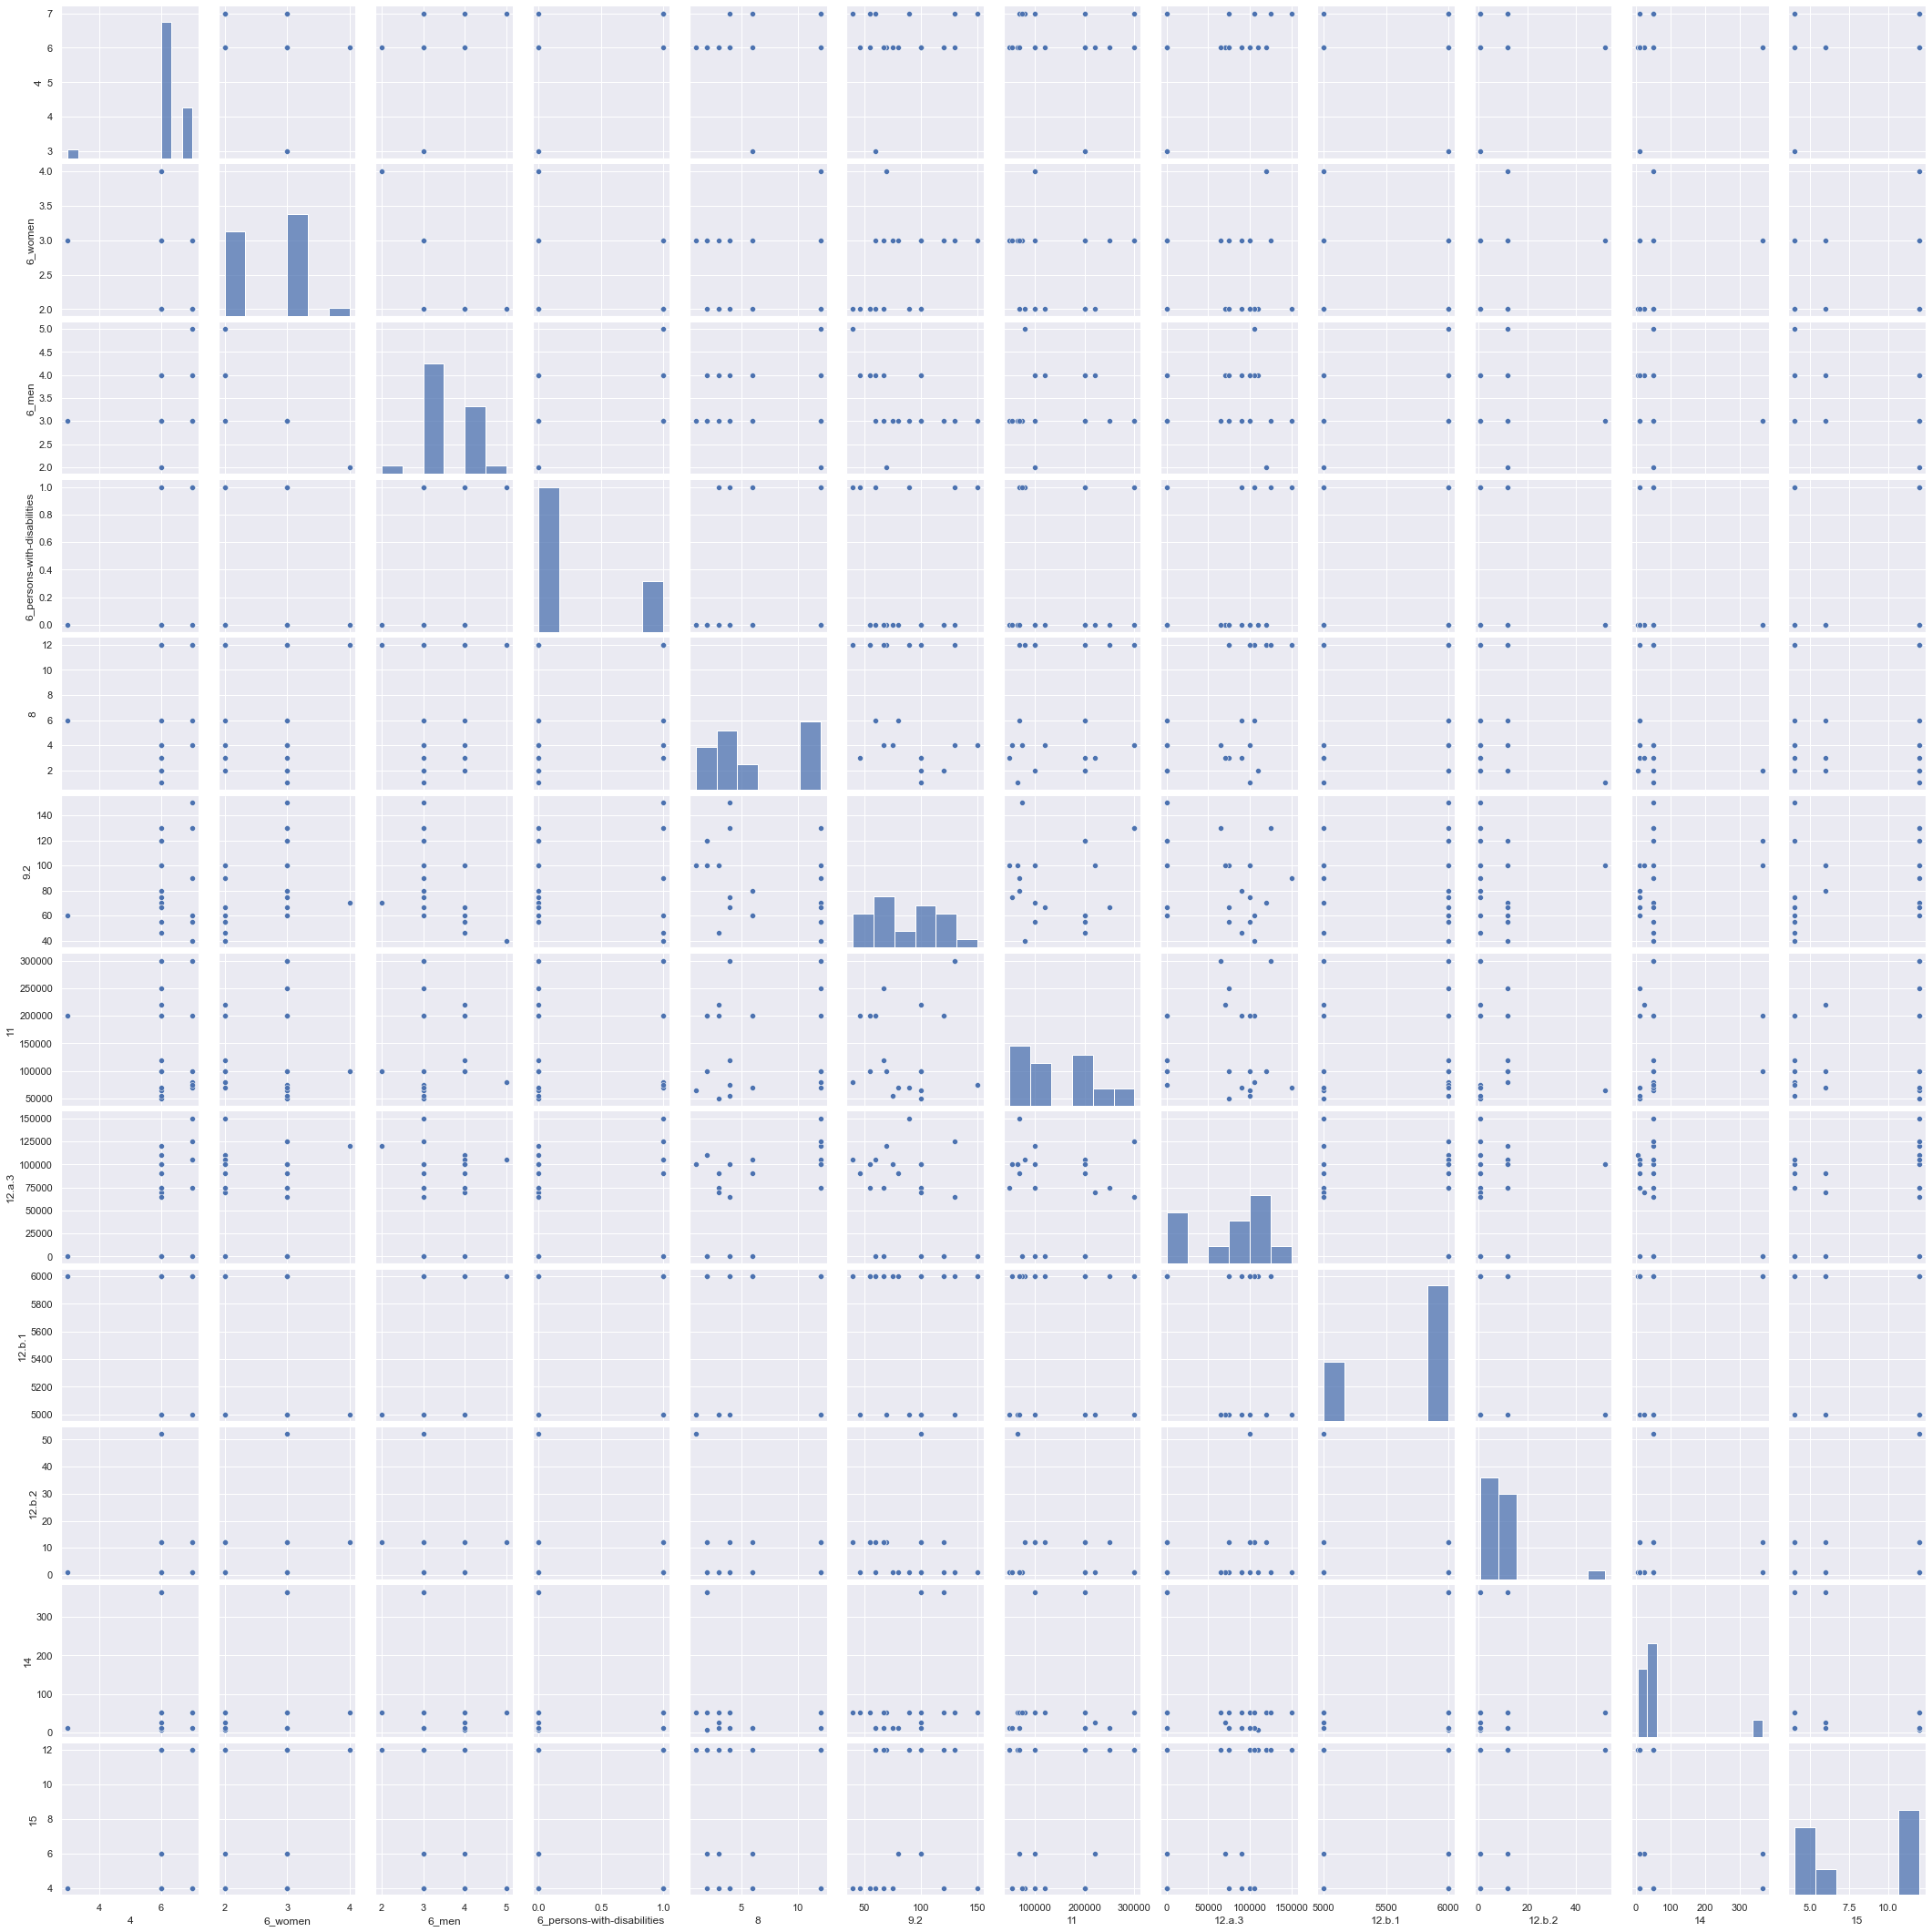

In [7]:
#Visualization (part 1)
#Create a pairplot to visually examine the potential relationship between variables

#Pairplot Visualization
sns.pairplot(simple_df);

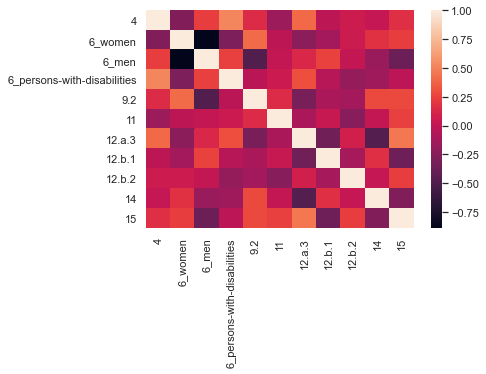

In [8]:
#Visualization (part 2)
#Create a heatmap as a secondary method of visually examining the potential relationship between variables

#Heatmap Visualization
simple_corr = simple_df.corr(method='pearson')
sns.heatmap(simple_corr);

#### Linear Regression

Choose two variables. In this example, I have chosen Question 15 and  12.b.2 which are related to frequency of borehole service and water user fee collection rate. Please fill in dataframe, variables, titles, and labels that best represent the variables that you chose for analysis. Explanation are of code and method are included as annotations.

You can see my complete example at the bottom. 

In [ ]:
#Using linear regression analysis as the method to determine if there is a relationship
#We are not asking if there are differences in points, just determining if there exists trends
#Using Ordinary Least Squares because we are assuming homoscedasticity and no autocorrelation (all points independent with no delay)
#Would use Generalized Least Squares (GLS) should heteroscedasticity or autocorrelation be true

In [12]:
#Isolating the Data
isolated_df = data.copy() #create a copy of the wrangled DataFrame; rename isolated_df according to desired variables
isolated_df = isolated_df[[15, '12.b.2']] #choose the two variables that you wish to evaluate
isolated_df = isolated_df.dropna() #drop with missing values, as they cannot be evaluated
isolated_df = isolated_df.reset_index(drop=True) #reset the index after dropping values

isolated_df #check the DataFrame to verify chosen variables

,15,12.b.2
0,12.0,52
1,12.0,12
2,4.0,1
3,12.0,1
4,12.0,1
5,6.0,1
6,12.0,12
7,4.0,1
8,12.0,1
9,4.0,12


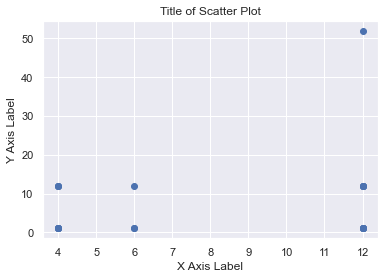

In [13]:
#Creating x and Y variables
x_variable = isolated_df[15] #choose the column of your x-variable
y_variable = isolated_df['12.b.2'] #choose the column of your y-variable

#Scatter Plot
plt.scatter(x_variable, y_variable)
plt.title('Title of Scatter Plot')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label');

In [14]:
#Import Statistics Package
import statsmodels.api as sm

In [15]:
#Ordinary Least Squares Regression
isolated_ols = sm.OLS(y_variable, x_variable)
isolated_reg = isolated_ols.fit()

In [16]:
#Parameters for Evaluation of the fit
print('p-value:', isolated_reg.pvalues.loc[15]) #the p-values will use the length of the x-variable
print('Parameters:', isolated_reg.params)
print('R2:', isolated_reg.rsquared)
print('Standard errors:', isolated_reg.bse)
print('Predicted values:', isolated_reg.predict())
print(isolated_reg.summary())

p-value: 0.0036819442290959843
Parameters: 15    0.899761
dtype: float64
R2: 0.3507859605649932
Standard errors: 15    0.273707
dtype: float64
Predicted values: [10.79713604 10.79713604  3.59904535 10.79713604 10.79713604  5.39856802
 10.79713604  3.59904535 10.79713604  3.59904535 10.79713604 10.79713604
 10.79713604  3.59904535  3.59904535  3.59904535  3.59904535  5.39856802
  5.39856802 10.79713604  3.59904535]
                                 OLS Regression Results                                
Dep. Variable:                 12.b.2   R-squared (uncentered):                   0.351
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              10.81
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                     0.00368
Time:                        20:48:38   Log-Likelihood:                         -80.029
No. Observations:                  21   AIC:          

In [17]:
#Visualizing the fit (1)
#establishing the confidence intervals
isolated_pred = isolated_reg.get_prediction()
iv_l = isolated_pred.summary_frame()['obs_ci_lower'] #lower confidence interval line
iv_u = isolated_pred.summary_frame()['obs_ci_upper'] #upper confidence internal line

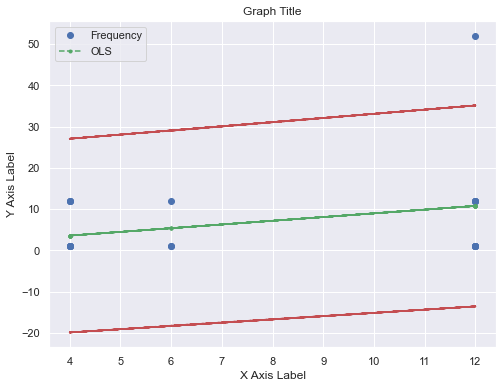

In [18]:
#Visualizing the fit (2)
#plotting the results
fig, ax = plt.subplots(figsize=(8, 6)) #size of the graph
ax.plot(x_variable, y_variable, 'o', label='Frequency') #scatter plot of points
ax.plot(x_variable, isolated_reg.fittedvalues, 'g--.', label='OLS') #best fit line
ax.plot(x_variable, iv_u, 'r--') #upper ci
ax.plot(x_variable, iv_l, 'r--') #lower ci
ax.legend(loc='best') #legend location
ax.set_title('Graph Title')
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label');

### Questions  
How does the linear regression inform you about the two chosen variables and their relationship?    
What are the implications of the results?  
How can similar data wrangling and linear regression techniques be applied to other datasets?

### Complete Example

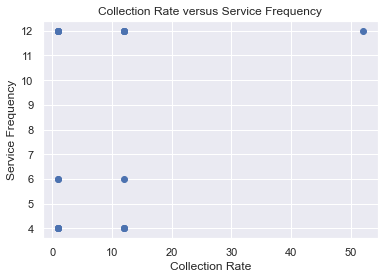

In [5]:
#Is there a relationship between frequency of service and frequency of fee collection?
#Premise of this question is that if money flows more consistently, more likely to service more frequently

#data[15] = frequency of service
#data['12.b.2'] = collection rate

#Isolating the Data
finance_repair = data.copy()
finance_repair = finance_repair[[15, '12.b.2']]
finance_repair = finance_repair.dropna()
finance_repair = finance_repair.reset_index(drop=True)

finance_repair

#Creating x and Y variables
#X
collection_rate = finance_repair['12.b.2']
#Y
service_frequency = finance_repair[15]

#Scatter Plot
plt.scatter(collection_rate, service_frequency)
plt.title('Collection Rate versus Service Frequency')
plt.xlabel('Collection Rate')
plt.ylabel('Service Frequency');

p-value: 0.003681944229095977
Parameters: 12.b.2    0.389866
dtype: float64
R2: 0.3507859605649932
Standard errors: 12.b.2    0.118597
dtype: float64
Predicted values: [20.27300931  4.67838676  0.38986556  0.38986556  0.38986556  0.38986556
  4.67838676  0.38986556  0.38986556  4.67838676  0.38986556  0.38986556
  4.67838676  0.38986556  4.67838676  4.67838676  0.38986556  4.67838676
  0.38986556  4.67838676  0.38986556]
                                 OLS Regression Results                                
Dep. Variable:                     15   R-squared (uncentered):                   0.351
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              10.81
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                     0.00368
Time:                        20:41:01   Log-Likelihood:                         -71.248
No. Observations:                  21   AIC:   

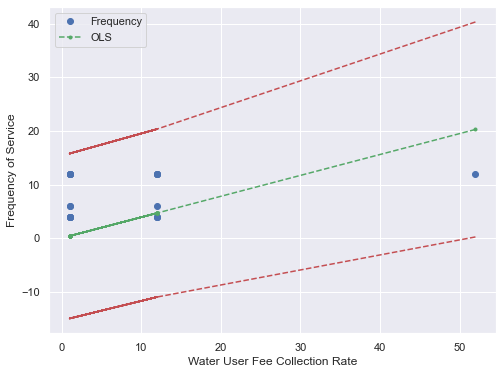

In [9]:
#Linear Regression
import statsmodels.api as sm

#sm.OLS(y_var, x_var)
f_r_ols = sm.OLS(service_frequency, collection_rate)
fr_reg = f_r_ols.fit()
print('p-value:', fr_reg.pvalues.loc['12.b.2'])
print('Parameters:', fr_reg.params)
print('R2:', fr_reg.rsquared)
print('Standard errors:', fr_reg.bse)
print('Predicted values:', fr_reg.predict())
print(fr_reg.summary())

fr_ols = fr_reg.get_prediction()
iv_l = fr_ols.summary_frame()['obs_ci_lower']
iv_u = fr_ols.summary_frame()['obs_ci_upper']

fig, ax = plt.subplots(figsize=(8, 6))

#Visualizing the fit
ax.plot(collection_rate, service_frequency, 'o', label='Frequency')
ax.plot(collection_rate, fr_reg.fittedvalues, 'g--.', label='OLS')
ax.plot(collection_rate, iv_u, 'r--')
ax.plot(collection_rate, iv_l, 'r--')
ax.legend(loc='best')
ax.set_xlabel('Water User Fee Collection Rate')
ax.set_ylabel('Frequency of Service');